## Xsurv

The data come from the publication of the R package Xsurv for prognostic biomarker discovery with high-dimensional features and survival outcomes. It contains 320 patients with 3 clinical covariates (sex, age, and metastatic melanoma stage) and 197 filtered methylation CpG sites. The objective is to identify CpG sites with prognostic values. 

The target is the melanoma stage, which is binarized and encoded as follow:
 * 1: low stage group
 * 2: high stage group


> See more information at *Efficient gradient boosting for prognostic biomarker discovery* (https://doi.org/10.1093/bioinformatics/btab869 and https://github.com/wanglab1/Xsurv).



In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("../data/Xsurv.csv", index_col=0)
df.head()

,SEX,AGE,Stage,cg27248148,cg12058490,cg00241712,cg16118089,cg01654582,cg19291355,cg06050065,...,cg14781605,cg04983151,cg08185798,cg23960088,cg25229172,cg09709592,cg16523801,cg15794034,cg13640200,cg07294263
1,2,53,1,0.688097,0.897329,1.019083,-0.924499,-1.127179,-1.281784,0.988680,...,0.735094,-0.471669,-0.707190,0.725518,-1.092426,0.219400,0.924476,0.584913,0.602759,-0.784221
2,2,64,1,-0.167593,0.187312,0.420220,-0.332361,-0.994588,-1.301198,0.984446,...,-0.662482,0.605492,-0.021156,1.264888,-0.039521,0.673367,0.987526,-0.181029,-0.585994,0.197806
3,2,64,2,-0.107404,0.876143,0.207461,-0.462419,-0.970031,-1.159380,0.864928,...,-0.220887,1.255080,0.419770,0.956803,-0.252576,0.613774,0.858919,0.057747,-0.389359,-0.043192
21,1,22,2,0.224873,0.704260,0.027405,-0.663955,-0.944272,-1.235145,0.976426,...,-0.007617,0.730081,0.639056,1.142790,-0.648752,0.480485,0.916909,-0.516643,-0.611523,0.259414
28,1,61,2,-0.383246,-0.067605,0.187677,-0.301763,-1.227389,-1.332657,0.755529,...,0.080295,-0.076832,-0.934310,1.179199,-0.838930,0.747185,0.651451,0.586711,-0.714334,-0.483034


In [7]:
df.shape

(320, 200)

In [6]:
X = df.drop(columns=['Stage'])
y = df.Stage

In [9]:
y.value_counts()

Stage
2    163
1    157
Name: count, dtype: int64

As we can see, a few columns are highly correlated (>0.9)

Text(0, 0.5, 'explained variance ratio')

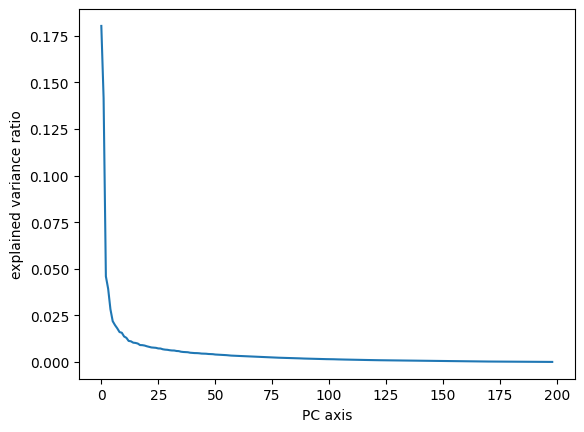

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
pca = PCA()

x_pca = pca.fit_transform( sc.fit_transform(X) )


plt.plot( pca.explained_variance_ratio_ )
plt.xlabel("PC axis")
plt.ylabel("explained variance ratio")

<Axes: >

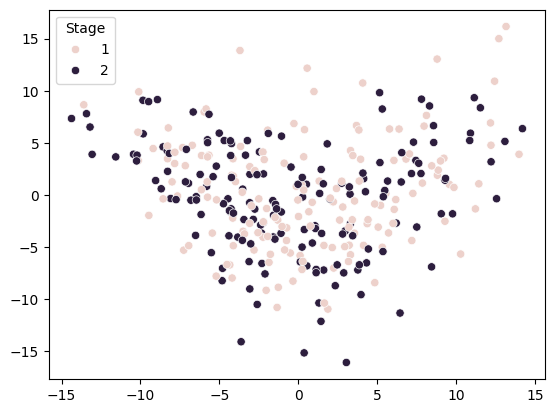

In [20]:
sns.scatterplot( x = x_pca[:,0] , y = x_pca[:,1], hue = y )

The goal of this project is to discover which CpG marker are the most diagnostic for cancer stage.

As such, the objective is not so much to build a good model than to interpret it and test if your putative biomarkers are enough to predict cancer stage.

> Remember to respect ML best practices (train/test separation, cross-validation, use adapted metrics, ...)